# (Pycaret) House Price Prediction

Last Update : 2022/09/23

Pycaret Version : 2.3.10

Author : [jhbale11](https://github.com/jhbale11)

## Table of Contents

### [Import Libraries](#Import-the-Libraries)
### [Data Repository](#Data-Repository)
### [Load Data](#Load-Data)

### 1. [Data Preprocessing](#Data-Preprocessing)
### 2. [Setup](#Setup)
### 3. [Compare Models](#Compare-Models)
### 4. [Create Model](#Create-Model)
### 5. [Tune Created Model](#Tune-Created-Model)
### 6. [Ensemble Model](#Ensemble-Model)
### 7. [Plot Model](#Plot-Model)
### 8. [Evaluate Model](#Evaluate-Model)
### 9. [Interpret Model](#Interpret-Model)
### 10. [Save and Load Model](#Save-and-Load-past-models)

# Import the Libraries

In [8]:
from pycaret.classification import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

plt.figure(figsize=(20,5))
plt.rcParams['font.family'] = 'NanumGothic'

<Figure size 1440x360 with 0 Axes>

In [2]:
from pycaret.utils import version
version()

'2.3.10'

# Data Repository

In [2]:
from pycaret.datasets import get_data

index = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


# Load Data

- Dataset : credit
- Columns : `24`
- Rows : `24000` records

### Dataset Description

- train.csv - the training set
- test.csv - the test set
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

In [3]:
data = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [4]:
data.shape

(24000, 24)

# Data Preprocessing

In [5]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,167876.403333,1.600917,1.850958,1.553000,35.446708,-0.023875,-0.140500,-0.170000,-0.221500,-0.266833,-0.294417,51105.607208,49112.465792,4.687850e+04,43172.528083,40190.249458,38722.892708,5687.489833,5.928435e+03,5227.245458,4766.803417,4774.861792,5280.923917,0.221083
std,129907.454723,0.489720,0.787361,0.521331,9.180845,1.123806,1.194216,1.198712,1.171784,1.133220,1.146316,73647.549162,71186.768604,6.931527e+04,64075.909188,60385.391344,59259.183390,17011.021882,2.423232e+04,17918.982291,15421.988078,15400.224129,18214.205137,0.414985
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-53007.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3479.750000,2907.750000,2.594250e+03,2294.000000,1718.500000,1238.000000,1000.000000,8.200000e+02,390.000000,285.000000,239.750000,111.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22217.000000,21107.000000,2.000950e+04,19000.000000,18059.500000,16846.000000,2102.500000,2.013000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66996.750000,63997.250000,6.022025e+04,54837.250000,50320.000000,49327.500000,5011.000000,5.000000e+03,4512.000000,4040.250000,4024.250000,4010.500000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
data.dtypes

LIMIT_BAL      int64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
dtype: object

# Setup

To start with Pycaret, the first step is to import all methods and attributes from pycaret's regression model

Pycaret workflow always starts with `setup` function which prepares the environment for the entire ML pipeline. 

Thus `setup` must be executed before any other functions.

### Parameters
- data : Input data
- target : Predication target column
- session_id : Set random seed
- normalize : Data normalization
- normalize_method : 'zscore', 'minmax', 'maxabs', 'robust'
- transformation : Make data samples distribution more like gaussian
- remove_outliers
- remove_multicollinearity
- ignore_low_variance
- combine_rare_levels

In [9]:
clf1 = setup(data, 
             target = 'default', 
             session_id=123, 
             log_experiment=True, 
             experiment_name='credit1')

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(24000, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


2022/09/23 09:41:21 INFO mlflow.tracking.fluent: Experiment with name 'credit1' does not exist. Creating a new experiment.


# Compare Models

Once the `setup` is excuted, we can use `compare_model()` to briefly evaluate the performance of all the models in the model library of Pycaret. This function train all the models available in the model library and scores them using stratified cross validation. 

The output prints a score grid Accuracy, AUC, Recall, Prec, F1, Kappa, MCC, TT.

### Compare models in pycaret.classification library

In [10]:
comp_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8206,0.7652,0.3782,0.6732,0.4839,0.3857,0.4094,0.0890
lightgbm,Light Gradient Boosting Machine,0.8205,0.7751,0.3782,0.6727,0.4838,0.3854,0.4091,0.0790
ridge,Ridge Classifier,0.8200,0.0000,0.3561,0.6841,0.4679,0.3725,0.4015,0.0210
gbc,Gradient Boosting Classifier,0.8196,0.7786,0.3590,0.6792,0.4694,0.3731,0.4007,0.7900
ada,Ada Boost Classifier,0.8183,0.7729,0.3422,0.6843,0.4556,0.3610,0.3925,0.2000
rf,Random Forest Classifier,0.8153,0.7614,0.3646,0.6532,0.4676,0.3666,0.3896,0.4370
xgboost,Extreme Gradient Boosting,0.8127,0.7576,0.3697,0.6377,0.4675,0.3636,0.3837,0.9710
et,Extra Trees Classifier,0.8067,0.7346,0.3729,0.6075,0.4616,0.3520,0.3679,0.4050
lr,Logistic Regression,0.7773,0.6439,0.0000,0.0000,0.0000,0.0000,0.0000,0.4720
dummy,Dummy Classifier,0.7773,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0170


### Check model list in `models()`, after `setup()` you can now see what models will be used

In [11]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


# Create Model

In [20]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8256,0.7743,0.3904,0.6919,0.4991,0.4033,0.4276
1,0.8190,0.7589,0.3503,0.6823,0.4629,0.3673,0.3969
2,0.8310,0.7796,0.4251,0.6974,0.5282,0.4326,0.4522
3,0.8119,0.7552,0.3583,0.6381,0.4589,0.3558,0.3775
4,0.8202,0.7774,0.4144,0.6513,0.5065,0.4032,0.4186
5,0.8161,0.7870,0.3503,0.6650,0.4588,0.3606,0.3876
6,0.8250,0.7424,0.3930,0.6869,0.5000,0.4033,0.4264
7,0.8190,0.7704,0.3636,0.6733,0.4722,0.3746,0.4005
8,0.8107,0.7428,0.3493,0.6390,0.4517,0.3490,0.3723


In [13]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8196,0.7751,0.3797,0.6667,0.4838,0.3844,0.4067
1,0.8196,0.7703,0.3449,0.6898,0.4599,0.3658,0.3975
2,0.8256,0.7844,0.4144,0.6769,0.5141,0.4152,0.4338
3,0.8119,0.7651,0.3422,0.6465,0.4476,0.3469,0.3724
4,0.8196,0.7987,0.4064,0.6524,0.5008,0.3979,0.4145
5,0.8202,0.7764,0.3610,0.6818,0.4720,0.3758,0.4035
6,0.8220,0.7629,0.3797,0.6794,0.4871,0.3897,0.4139
7,0.8179,0.7708,0.3797,0.6574,0.4814,0.3804,0.4015
8,0.8161,0.7648,0.3627,0.6602,0.4682,0.3681,0.3923


In [14]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8250,0.0000,0.3663,0.7062,0.4824,0.3896,0.4200
1,0.8155,0.0000,0.3235,0.6798,0.4384,0.3443,0.3783
2,0.8286,0.0000,0.3957,0.7048,0.5068,0.4128,0.4381
3,0.8143,0.0000,0.3422,0.6598,0.4507,0.3522,0.3797
4,0.8244,0.0000,0.4037,0.6771,0.5059,0.4073,0.4274
5,0.8161,0.0000,0.3235,0.6836,0.4392,0.3456,0.3803
6,0.8208,0.0000,0.3663,0.6816,0.4765,0.3800,0.4067
7,0.8155,0.0000,0.3396,0.6684,0.4504,0.3534,0.3827
8,0.8089,0.0000,0.3173,0.6467,0.4258,0.3268,0.3567


In [15]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8202,0.7818,0.3529,0.6875,0.4664,0.3715,0.4014
1,0.8167,0.7800,0.3289,0.6833,0.4440,0.3500,0.3836
2,0.8298,0.7890,0.4064,0.7037,0.5153,0.4209,0.4442
3,0.8089,0.7670,0.3316,0.6359,0.4359,0.3343,0.3600
4,0.8238,0.7980,0.3877,0.6840,0.4949,0.3979,0.4214
5,0.8190,0.7857,0.3449,0.6862,0.4591,0.3644,0.3955
6,0.8190,0.7621,0.3610,0.6750,0.4704,0.3731,0.3998
7,0.8179,0.7750,0.3583,0.6700,0.4669,0.3690,0.3953
8,0.8089,0.7690,0.3253,0.6421,0.4319,0.3315,0.3592


In [16]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8244,0.7679,0.3422,0.7232,0.4646,0.3753,0.4129
1,0.8173,0.7826,0.3262,0.6893,0.4428,0.3498,0.3849
2,0.8256,0.7792,0.3984,0.6866,0.5042,0.4073,0.4296
3,0.8125,0.7572,0.3316,0.6561,0.4405,0.3422,0.3710
4,0.8173,0.7871,0.3717,0.6588,0.4752,0.3748,0.3973
5,0.8137,0.7811,0.3128,0.6763,0.4278,0.3340,0.3695
6,0.8143,0.7629,0.3155,0.6782,0.4307,0.3369,0.3722
7,0.8190,0.7770,0.3422,0.6882,0.4571,0.3629,0.3949
8,0.8107,0.7576,0.3093,0.6629,0.4218,0.3261,0.3600


In [17]:
models(type='ensemble').index.to_list()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm']

In [19]:
ensembled_model = compare_models(include=models(type='ensemble').index.tolist(), fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8196,0.7733,0.3742,0.6702,0.4801,0.3814,0.4052,0.1080
gbc,Gradient Boosting Classifier,0.8193,0.7782,0.3577,0.6790,0.4684,0.3719,0.3998,0.9580
ada,Ada Boost Classifier,0.8176,0.7701,0.3443,0.6784,0.4567,0.3609,0.3909,0.2600
rf,Random Forest Classifier,0.8155,0.7584,0.3662,0.6532,0.4692,0.3681,0.3908,0.4960
xgboost,Extreme Gradient Boosting,0.8120,0.7533,0.3689,0.6340,0.4662,0.3616,0.3813,1.0900
et,Extra Trees Classifier,0.8051,0.7327,0.3737,0.6004,0.4606,0.3494,0.3641,0.4220


# Tune Created Model

In [22]:
lda = tune_model(lda)
gbc = tune_model(gbc)
ada = tune_model(ada)
lgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8232,0.7851,0.3850,0.6825,0.4923,0.3952,0.4189
1,0.8161,0.7805,0.3476,0.6667,0.4569,0.3592,0.3868
2,0.8220,0.7848,0.4198,0.6569,0.5122,0.4098,0.4252
3,0.8113,0.7692,0.3583,0.6351,0.4581,0.3545,0.3758
4,0.8196,0.7999,0.4171,0.6473,0.5073,0.4032,0.4178
5,0.8179,0.7850,0.3663,0.6650,0.4724,0.3733,0.3976
6,0.8238,0.7674,0.3904,0.6822,0.4966,0.3993,0.4221
7,0.8143,0.7842,0.3717,0.6435,0.4712,0.3682,0.3886
8,0.8089,0.7717,0.3627,0.6239,0.4587,0.3524,0.3715


In [23]:
blender = blend_models(estimator_list = [lda, gbc, ada, lgbm])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8268,0.7839,0.3984,0.6930,0.5059,0.4101,0.4332
1,0.8179,0.7782,0.3449,0.6789,0.4574,0.3617,0.3917
2,0.8304,0.7824,0.4385,0.6862,0.5351,0.4374,0.4538
3,0.8155,0.7682,0.3636,0.6538,0.4674,0.3666,0.3897
4,0.8214,0.8016,0.4064,0.6609,0.5033,0.4019,0.4196
5,0.8202,0.7845,0.3690,0.6765,0.4775,0.3801,0.4056
6,0.8262,0.7605,0.4091,0.6830,0.5117,0.4140,0.4341
7,0.8179,0.7827,0.3770,0.6589,0.4796,0.3790,0.4007
8,0.8042,0.7696,0.3467,0.6075,0.4414,0.3333,0.3526


# Finalizing Model for Predictions

In [35]:
best = finalize_model(blender, return_train_score =True)
best

[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 

VotingClassifier(estimators=[('lda',
                              LinearDiscriminantAnalysis(n_components=None,
                                                         priors=None,
                                                         shrinkage='auto',
                                                         solver='lsqr',
                                                         store_covariance=False,
                                                         tol=0.0001)),
                             ('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.15,
                                                         loss='deviance',
                                                         max_depth=7,
                                     

In [25]:
new_data = data.copy()
new_data.drop(['default'], axis=1, inplace=True)

predict_new = predict_model(best, data=new_data)
predict_new.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Label,Score
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.9333
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1,0.9202
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1,0.9250
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.5911
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,1,0.9233


# Plot Model

The `plot_model()` function provides tools to further analyze the performance of a model.

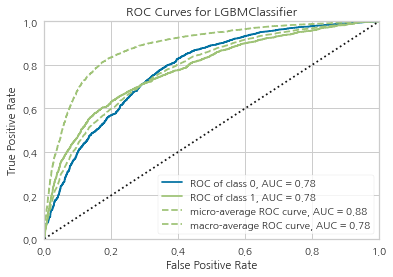

In [28]:
plot_model(lgbm)

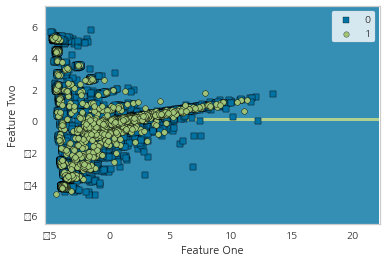

In [29]:
plot_model(lgbm, plot='boundary')

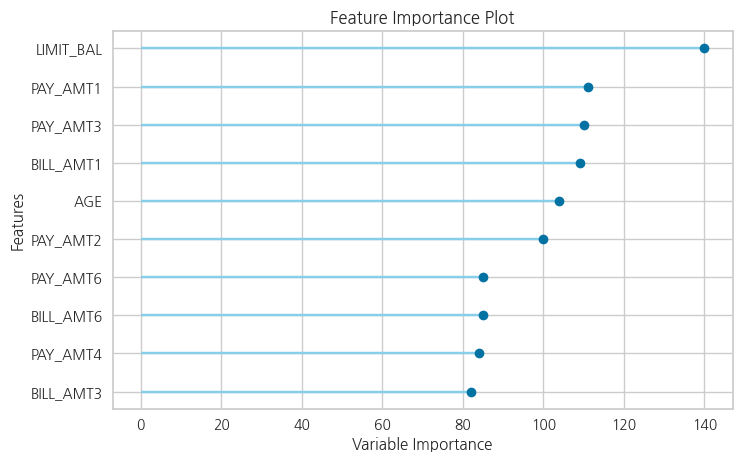

In [30]:
plot_model(lgbm, plot='feature')

# Evaluate Model

In [31]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Interpret Model

The `interpret_model()` function will return an interpretation plot based on the test/ hold-out set.

It only supports tree based algorithms based on [SHAP(SHapley Additive exPlanations)](https://shap.readthedocs.io/en/latest/)

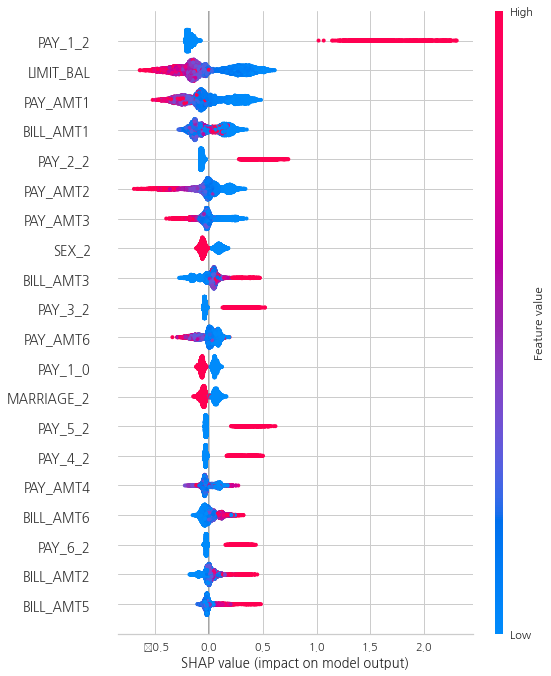

In [32]:
interpret_model(lgbm)

In [34]:
interpret_model(lgbm, plot='reason', observation=20)

# Save and Load past models

In [19]:
save_model(lgbm, './lgbm_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Alley', 'PoolQC',
                                                        'MiscFeature', 'Fence',
                                                        'FireplaceQu',
                                                        'Utilities'],
                                       id_columns=['Id'],
                                       ml_usecase='regression',
                                       numerical_features=[], target='SalePrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',...
                                                                                                       compute_score=True,
                                         

In [20]:
load_model = load_model('./final_model')
load_model['trained_model']

Transformation Pipeline and Model Successfully Loaded


PowerTransformedTargetRegressor(estimators=[('huber',
                                             HuberRegressor(alpha=0.01,
                                                            epsilon=1.1,
                                                            fit_intercept=True,
                                                            max_iter=100,
                                                            tol=1e-05,
                                                            warm_start=False)),
                                            ('br',
                                             BayesianRidge(alpha_1=0.3,
                                                           alpha_2=1e-06,
                                                           alpha_init=None,
                                                           compute_score=True,
                                                           copy_X=True,
                                                           fit_intercept

# Make Submission File

In [21]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub.columns

Index(['Id', 'SalePrice'], dtype='object')

In [22]:
sub = pd.DataFrame({
    "Id" : predictions['Id'],
    "SalePrice" : predictions['Label']
}
)

sub.to_csv('submission.csv', index=False)